In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from SyntheticControlMethods import Synth
from SyntheticControlMethods import DiffSynth
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

/tmp/ipykernel_1119464/1070651982.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in main.groupby(['Country']):


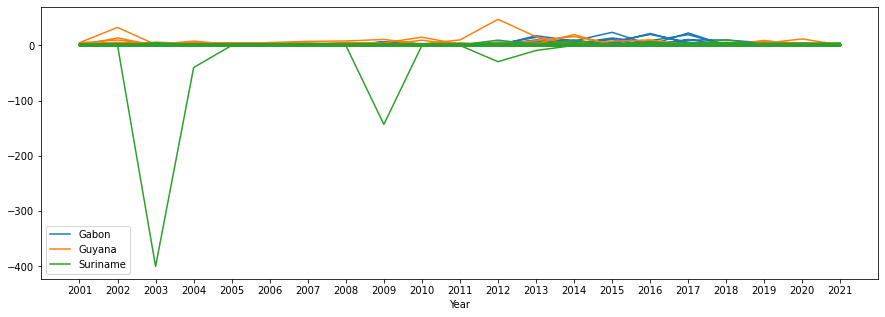

In [45]:
main = pd.read_csv('../data/main_unit.csv')

fig, ax = plt.subplots()
for key, grp in main.groupby(['Country']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Annual Tree Cover Loss', label=key, figsize=(15,5), xticks = [2000 + x for x in range(1,22)])

In [46]:
pop_growth = pd.read_csv('../data/covariates/population_growth_annual.csv')
ag_land = pd.read_csv('../data/covariates/agricultural_land.csv')
gdp_growth = pd.read_csv('../data/covariates/gdp_growth.csv')
for_rents = pd.read_csv('../data/covariates/forest_rents.csv')
min_rents = pd.read_csv('../data/covariates/mineral_rents.csv')

In [47]:
def match_covariate(row, cov_df):
    country = row['Country']
    year = row['Year']

    if country == 'Congo':
        country = 'Congo, Rep.'

    elif country == 'Congo DRC':
        country = 'Congo, Dem. Rep.'

    return float(cov_df[cov_df['Country Name'] == country][str(year)])

In [48]:
main['Population Growth'] = main.apply(
        match_covariate, axis=1, args=(pop_growth,))

In [49]:
main['Agricultural Land'] = main.apply(
        match_covariate, axis=1, args=(ag_land,))

In [50]:
main['GDP Growth'] = main.apply(
        match_covariate, axis=1, args=(gdp_growth,))

In [51]:
main['Forest Rents'] = main.apply(
        match_covariate, axis=1, args=(for_rents,))

In [52]:
main['Mineral Rents'] = main.apply(
        match_covariate, axis=1, args=(min_rents,))

In [53]:
main = main.drop(columns='Unnamed: 0')
main

,Country,Latitude,Longitude,Year,Annual Tree Cover Loss,Status,Population Growth,Agricultural Land,GDP Growth,Forest Rents,Mineral Rents
0,Guyana,8.3,-59.8,2001,0.028025,Treated,0.099812,5.716134,2.279522,8.490615,4.422916
1,Guyana,8.3,-59.8,2002,0.023573,Treated,0.067626,5.738694,1.132627,8.273747,4.511380
2,Guyana,8.3,-59.8,2003,0.074561,Treated,0.031429,5.761255,-0.632225,9.506019,7.442208
3,Guyana,8.3,-59.8,2004,0.000000,Treated,-0.018146,5.783815,1.563352,10.215034,10.984247
4,Guyana,8.3,-59.8,2005,0.098213,Treated,-0.094071,5.806375,-1.950958,10.624378,10.201725
...,...,...,...,...,...,...,...,...,...,...,...
105268,Gabon,0.1,13.9,2017,0.005025,Untreated,2.555919,8.541002,0.472642,3.067485,0.055790
105269,Gabon,0.1,13.9,2018,0.000000,Untreated,2.391355,8.587108,0.837917,2.556528,0.005163
105270,Gabon,0.1,13.9,2019,0.000000,Untreated,2.289855,8.587108,3.920809,2.243292,0.005662
105271,Gabon,0.1,13.9,2020,0.005026,Untreated,2.195637,8.587108,-1.837761,3.278746,0.031722


In [54]:
main.to_csv('../data/main_unit_gsynth.csv')

In [40]:
main = main.drop(columns=['Unnamed: 0', 'Annual Tree Cover Loss'])
main

,Country,Year,Forest Cover,Population Growth,Agricultural Land,GDP Growth,Forest Rents,Mineral Rents
0,Guyana,2001,2506834.17,0.099812,5.716134,2.279522,8.490615,4.422916
1,Guyana,2002,2506201.46,0.067626,5.738694,1.132627,8.273747,4.511380
2,Guyana,2003,2505226.26,0.031429,5.761255,-0.632225,9.506019,7.442208
3,Guyana,2004,2504700.81,-0.018146,5.783815,1.563352,10.215034,10.984247
4,Guyana,2005,2503945.47,-0.094071,5.806375,-1.950958,10.624378,10.201725
...,...,...,...,...,...,...,...,...
100,Peru,2017,9923080.81,1.506946,19.154772,2.518835,0.177548,5.398914
101,Peru,2018,9894471.23,1.875822,19.295773,3.969351,0.127980,5.231238
102,Peru,2019,9863205.80,1.909726,19.123664,2.240632,0.119357,3.519097
103,Peru,2020,9825515.69,1.451402,19.123664,-10.952699,0.132981,1.856777


In [41]:
sc = Synth(main, 'Forest Cover',
           'Country', 'Year', 2010, 'Guyana')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36344D+13    |proj g|=  8.33333D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1      2      6     0     6   0.000D+00   1.069D+13
  F =   10693335546443.539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.3

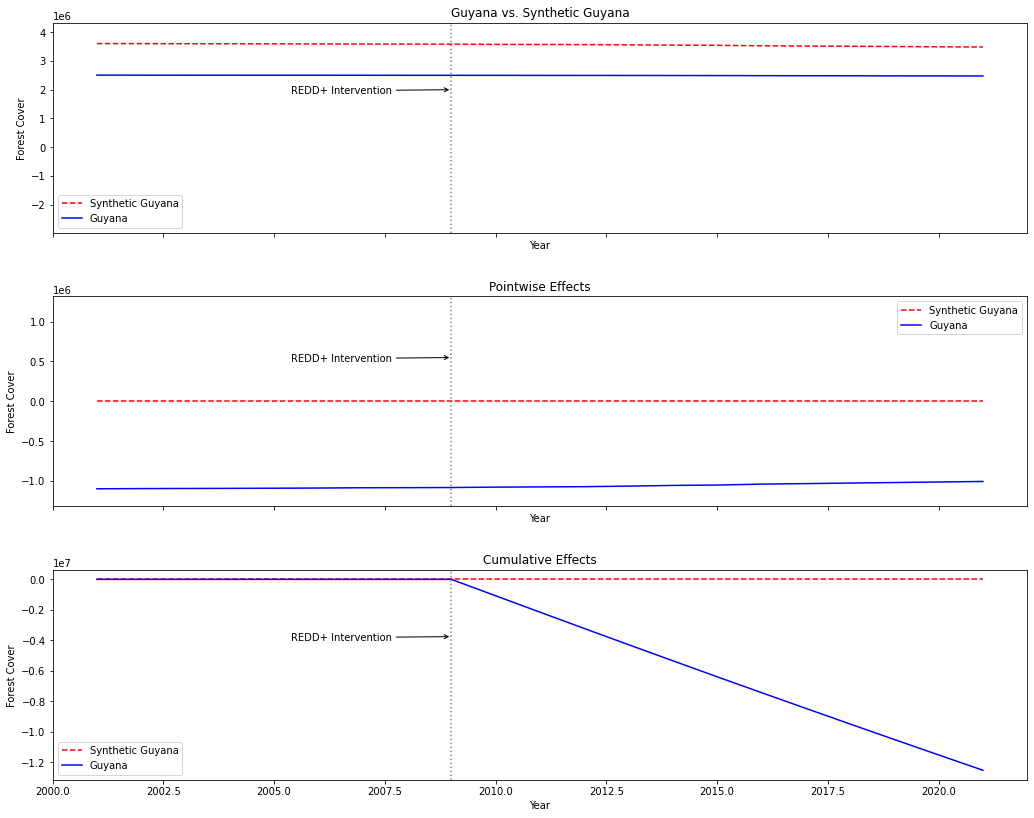

In [42]:
sc.plot(["original", "pointwise", "cumulative"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention")

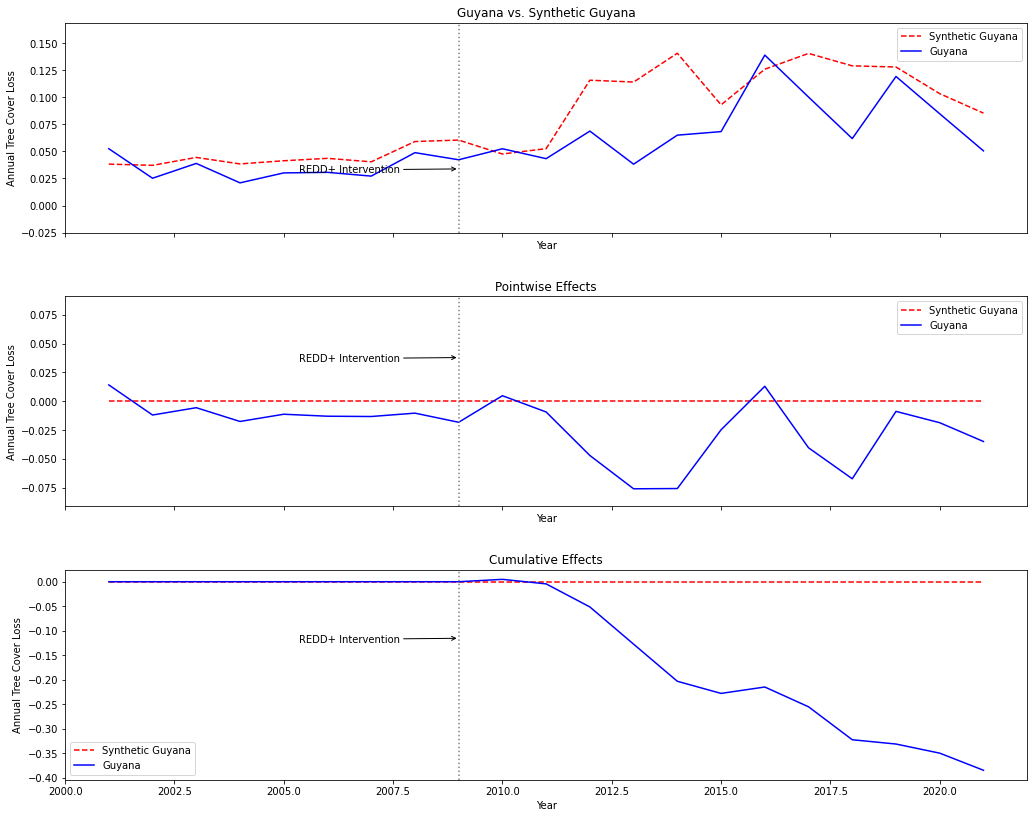

In [12]:
sc.plot(["original", "pointwise", "cumulative"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention")

In [43]:
sc.original_data.weight_df

,Weight
Congo,1.0


In [20]:
sc.original_data.comparison_df

,Guyana,Synthetic Guyana,WMAPE,Importance
Annual Tree Cover Loss,0.04,0.04,0.01,0.0
Population Growth,-0.11,1.89,2.00,0.0
Agricultural Land,5.81,3.18,4.26,1.0
GDP Growth,2.23,3.49,2.24,0.0
Forest Rents,7.68,1.48,6.20,0.0
Mineral Rents,6.35,2.48,3.86,0.0


In [ ]:
sc.in_time_placebo(2005, n_optim = 20)

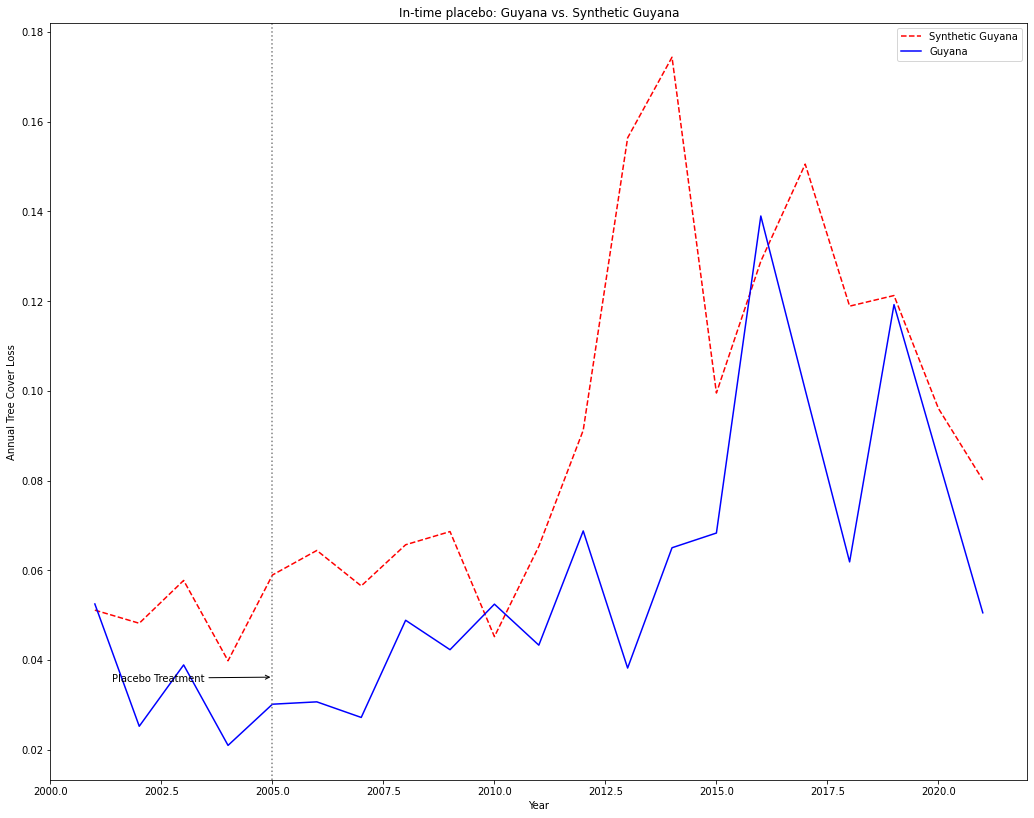

In [16]:
sc.plot(['in-time placebo'], 
            treated_label="Guyana",
            synth_label="Synthetic Guyana")

In [ ]:
sc.in_space_placebo(15)

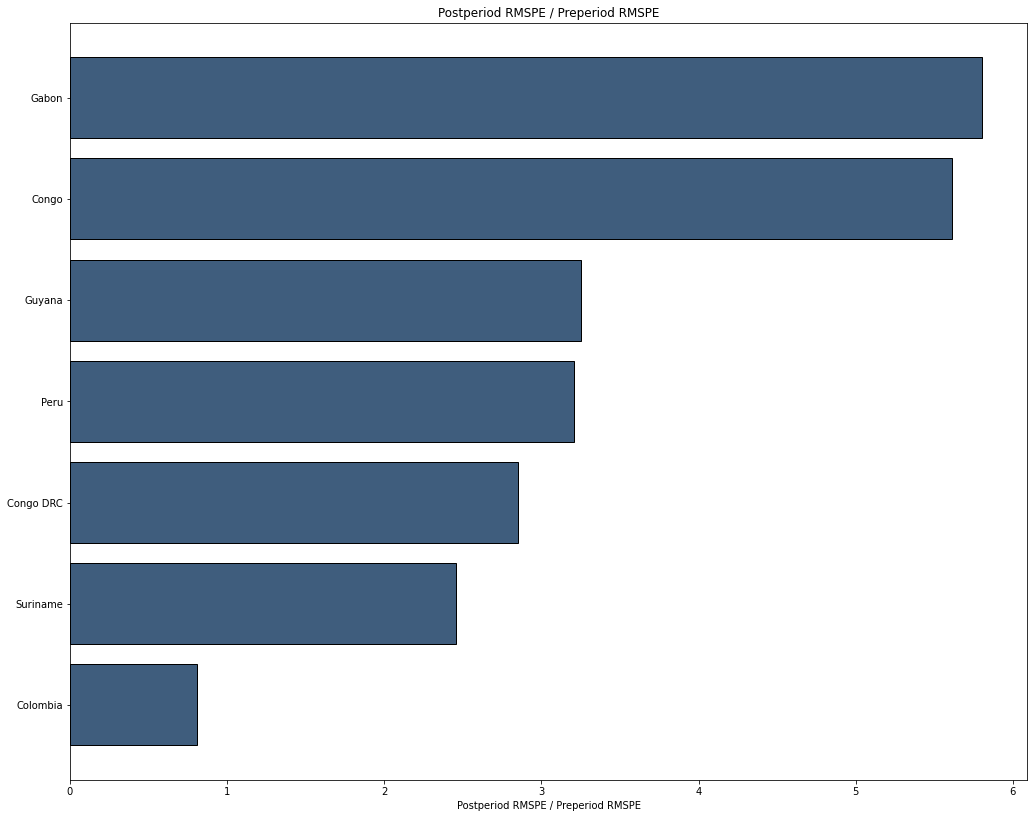

In [18]:
sc.plot(['rmspe ratio'])

In [ ]:
dsc = DiffSynth(main, 'Annual Tree Cover Loss',
           'Country', 'Year', 2010, 'Guyana')

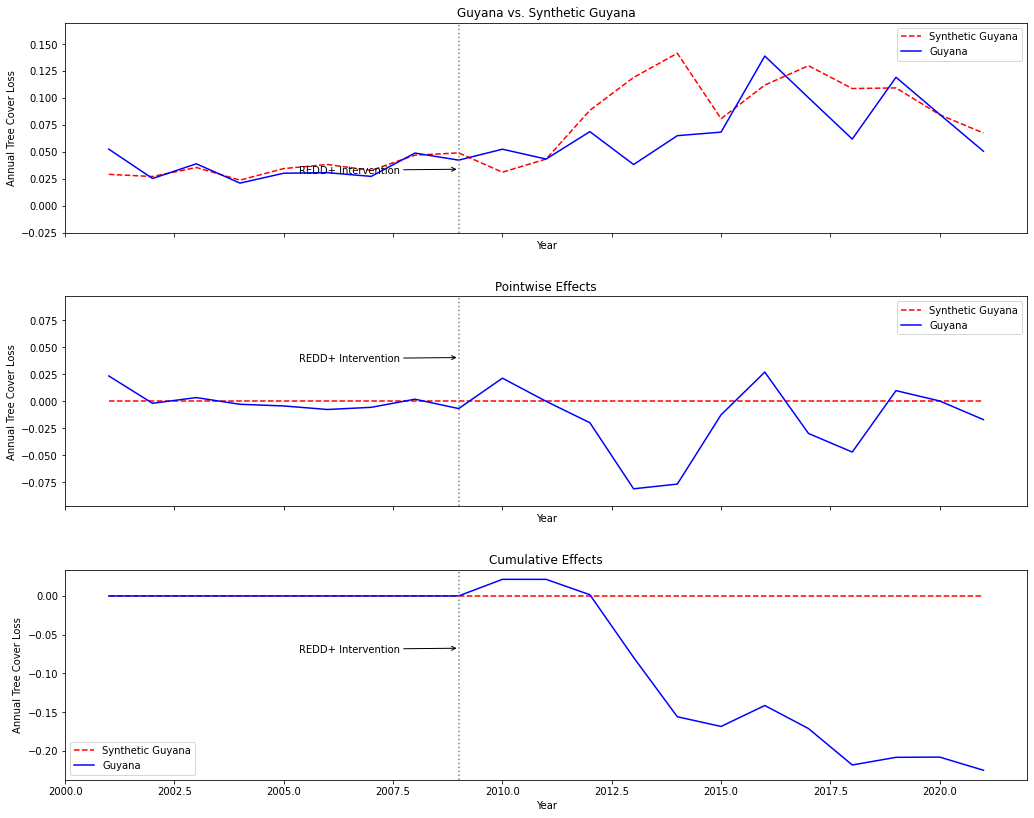

In [25]:
dsc.plot(["original", "pointwise", "cumulative"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention")

In [26]:
dsc.original_data.weight_df

,Weight
Suriname,0.468251
Gabon,0.531749


In [28]:
dsc.original_data.comparison_df

,Guyana,Synthetic Guyana,WMAPE,Importance
Annual Tree Cover Loss,-0.00,0.00,0.02,0.04
Population Growth,-0.14,2.17,2.28,0.60
Agricultural Land,5.82,4.55,3.72,0.13
GDP Growth,2.23,2.71,2.01,0.23
Forest Rents,7.58,2.02,5.63,0.00
Mineral Rents,6.59,1.87,4.55,0.00


In [ ]:
dsc.in_time_placebo(2005, n_optim = 20)

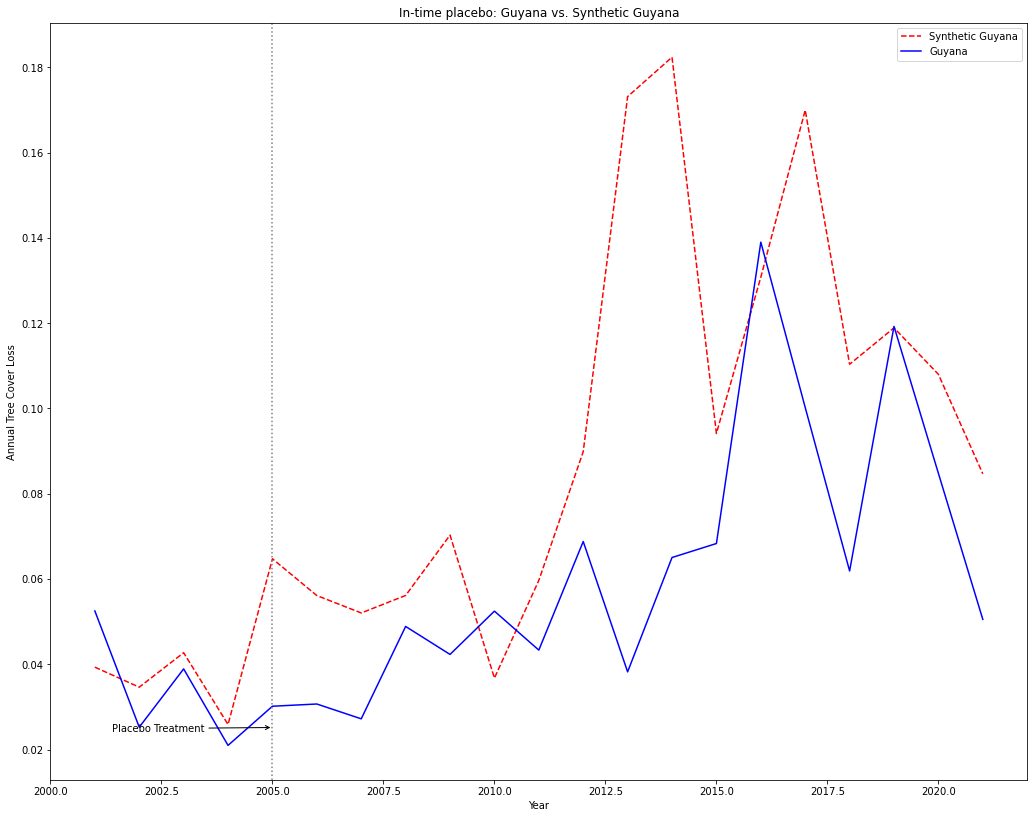

In [31]:
dsc.plot(['in-time placebo'], 
            treated_label="Guyana",
            synth_label="Synthetic Guyana")

In [ ]:
dsc.in_space_placebo(15)

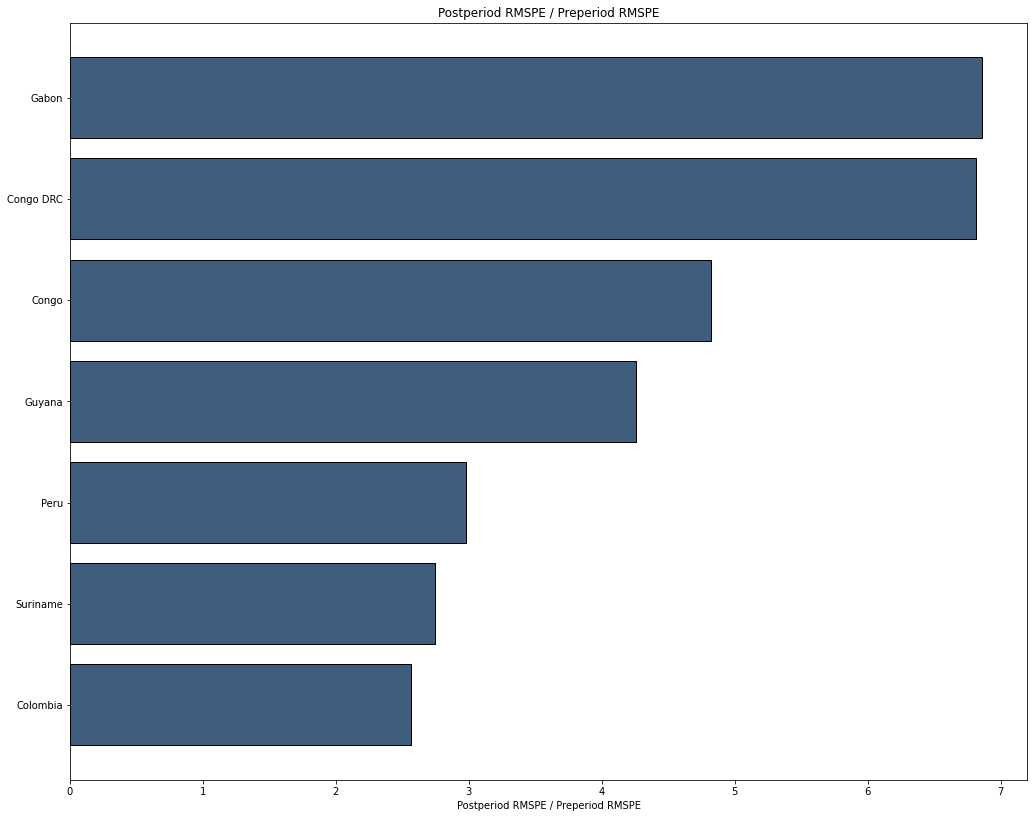

In [33]:
dsc.plot(['rmspe ratio'])

In [ ]:
sc = Synth(main[main['Country'] != 'Guyana'], 'Annual Tree Cover Loss',
           'Country', 'Year', 2015, 'Gabon')

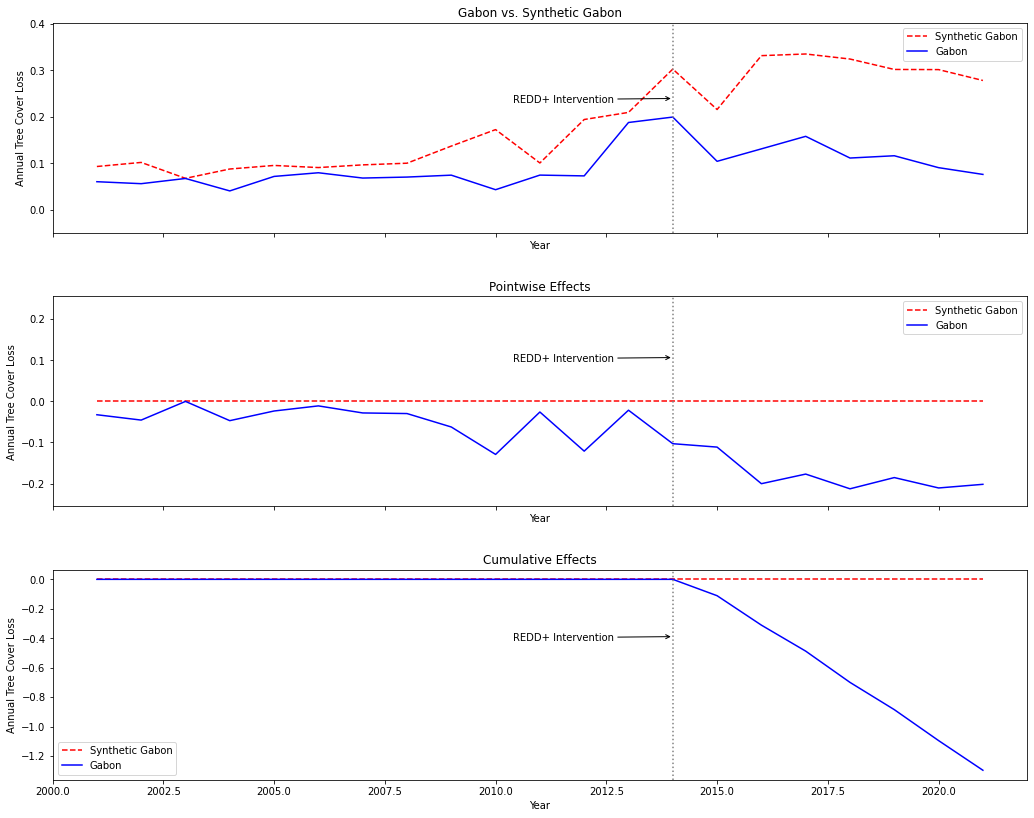

In [17]:
sc.plot(["original", "pointwise", "cumulative"], treated_label="Gabon", 
            synth_label="Synthetic Gabon", treatment_label="REDD+ Intervention")

In [ ]:
sc_drc = Synth(main[main['Country'] != 'Guyana'], 'Annual Tree Cover Loss',
           'Country', 'Year', 2009, 'Congo DRC')

In [ ]:
sc.plot(["original", "pointwise", "cumulative"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention")